*прежде всего импортируем необходимые для работы библиотеки*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

## Загрузка данных

поскольку нам придется импортировать несколько таблиц, напишем функцию, которая будет загружать, выводить в удобном нам виде и возвращать таблицу. 

In [2]:
def get_table(path):
    data=None
    try:
        data=pd.read_csv('/datasets/'+path)
        display(data.head(10))
    except: print('loading error')    
    return data

In [3]:
electrode_data=get_table('data_arc_new.csv')

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


In [4]:
data_bulk_materials_v=get_table('data_bulk_new.csv')

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


In [5]:
data_bulk_materials_t=get_table('data_bulk_time_new.csv')

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaN,NaN,NaN,2019-05-03 13:57:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:48:52,NaN,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaN,NaN,NaN,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:41:26,NaN,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:38:11,NaN,2019-05-03 16:34:24,2019-05-03 16:29:56


In [6]:
data_with_gas=get_table('data_gas_new.csv')

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


In [7]:
data_with_temp=get_table('data_temp_new.csv')

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


In [8]:
data_wire_v=get_table('data_wire_new.csv')

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_wire_t=get_table('data_wire_time_new.csv')

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Изучение и предобработка данных

*Прежде всего выведем основную информацию по каждой таблице, чтобы познакомится со всеми столбцами и их типами*

In [10]:
electrode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Прежде всего стоит отметить, что столбцы таблицы написаны на разных языках, что не очень хорошо (со стилистической точки зрения), так что все, те, что написаны на русском языке придется переименовать.
Так же, столбцам "Начало нагрева дугой" и "Конец нагрева дугой" присвоен тип object, хотя, как мы видели при выводе этой таблицы, там хранится точное время, так что типы этих столбцов нужно будет изменить на datetime.
Типы всех остальных столбцов корректны.

In [11]:
data_bulk_materials_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


Поскольку в столбце key хранится номер партии, который может быть только целочисленным, а в остальных значения объема подаваемого материала, тип float, типы даннх корректны. 
Но что касается названий столбцов, их нужно будет привести к стилю snake_case.

In [12]:
data_bulk_materials_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


Аналогичная ситуация с названиями столбцов, как в прошлой таблице. 
Поскольку во всех столбцах, кроме key, должны храниться значения времени, их типы данных нужно будет из object перевести в datetime. 

In [13]:
data_with_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


Аналогичная с первой таблицей ситуация с названиями столбцов.
Поскольку столбец "Газ" отображает объём подаваемого газа, он может быть типом float. Так что приведение типов данных в этой таблице не понадобится.

In [14]:
data_with_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


Аналогичная с первой таблицей ситуация с названиями столбцов.
Как и во всех предыдущих таблиах, время здесь представленно типом object, хотя должен быть datetime, так что это нужно будет исправить. 
Как можно увидеть по выведенной таблице, все значения в этом столбце после запятой имеют только 0, так что стоит данные из этого столбца привести к типу int64.

In [15]:
data_wire_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


Названия столбцов в этой таблице нужно будет привести к стилю snake_case.
За исключением "key", во всех столбцах хранится информация об объём подаваемых проволочных материалов, что говорит о том, что он может быть дробным, то есть тип данных float64 для него подходит, округление до int не нужно.

In [16]:
data_wire_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


в этой таблице польностью аналогичная ситуация с таблицей data_bulk_materials_t.

*Внесем описанные выше изменения*
1. таблица electrode_data:
        переименуем столбцы

In [17]:
electrode_data=electrode_data.rename(columns = {'Начало нагрева дугой' : 'electrode_start',\
                                                'Конец нагрева дугой' : 'electrode_end', 'Активная мощность' : 'active_power', \
                                                'Реактивная мощность' : 'reactive_power'})
display(electrode_data.head(2))

,key,electrode_start,electrode_end,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438


изменим типы столбцов:

In [18]:
electrode_data['electrode_start']=pd.to_datetime(electrode_data['electrode_start'])
electrode_data['electrode_end']=pd.to_datetime(electrode_data['electrode_end'])
electrode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   key              14876 non-null  int64         
 1   electrode_start  14876 non-null  datetime64[ns]
 2   electrode_end    14876 non-null  datetime64[ns]
 3   active_power     14876 non-null  float64       
 4   reactive_power   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


**поскольку нам придется привовить названия столбцов к стилю snake_case одинаковым алгоритмом в нескольких таблицах, напишем для этого функцию.**

In [19]:
def rename(data):
    columns=data.columns.str.lower()
    columns=columns.str.replace(' ', '_')
    data.columns=columns
    display(data.head())

2. data_bulk_materials_v

In [20]:
rename(data_bulk_materials_v)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


**поскольку нам придется привовить тип данных столбцов к datetime в нескольких таблицах, напишем для этого функцию.**

In [21]:
def make_datetime(data):
    columns=data.columns
    for col in columns:
        if col!='key':
            data[col]=pd.to_datetime(data[col])
    data.info()
    pass

3. data_bulk_materials_t
    
    прежде всего переименуем столбцы

In [22]:
rename(data_bulk_materials_t)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


изменим тип данных

In [23]:
make_datetime(data_bulk_materials_t)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_1   252 non-null    datetime64[ns]
 2   bulk_2   22 non-null     datetime64[ns]
 3   bulk_3   1298 non-null   datetime64[ns]
 4   bulk_4   1014 non-null   datetime64[ns]
 5   bulk_5   77 non-null     datetime64[ns]
 6   bulk_6   576 non-null    datetime64[ns]
 7   bulk_7   25 non-null     datetime64[ns]
 8   bulk_8   1 non-null      datetime64[ns]
 9   bulk_9   19 non-null     datetime64[ns]
 10  bulk_10  176 non-null    datetime64[ns]
 11  bulk_11  177 non-null    datetime64[ns]
 12  bulk_12  2450 non-null   datetime64[ns]
 13  bulk_13  18 non-null     datetime64[ns]
 14  bulk_14  2806 non-null   datetime64[ns]
 15  bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


4. data_with_gas

In [24]:
data_with_gas=data_with_gas.rename(columns = {'Газ 1' : 'volume_gas'})
display(data_with_gas.head(2))

,key,volume_gas
0,1,29.749986
1,2,12.555561


5. data_with_temp
        
      Прежде всего переименуем столбцы 

In [25]:
data_with_temp=data_with_temp.rename(columns = {'Время замера' : 'measurement_time',\
                                                'Температура' : 'temperature'})
display(data_with_temp.head(2))

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0


In [26]:
data_with_temp['measurement_time']=pd.to_datetime(data_with_temp['measurement_time'])
data_with_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               18092 non-null  int64         
 1   measurement_time  18092 non-null  datetime64[ns]
 2   temperature       14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


поскольку для преобразования в int64, в столбце не должно быть пропусков, посмотрим, какие могут быть там уникальные значения и пока что заполним их ими. Для преобраования. 
(Но это на этапе обработки пропущенных значений вероятнее всего мы их "переобработаем")

Выведем минимальное значение. 

In [27]:
print(min(data_with_temp['temperature']))

1191.0


Поскольку минимальное значение сильно отличается от 0, возьмем в качестве заглушки именно его.

In [28]:
data_with_temp['temperature']=data_with_temp['temperature'].fillna(0)

In [29]:
data_with_temp['temperature']=data_with_temp['temperature'].astype('int64')
data_with_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               18092 non-null  int64         
 1   measurement_time  18092 non-null  datetime64[ns]
 2   temperature       18092 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 424.2 KB


In [30]:
display(data_with_temp.head(2))

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571
1,1,2019-05-03 11:07:18,1604


6. data_wire_v

In [31]:
rename(data_wire_v)

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


7. data_wire_t

In [32]:
rename(data_wire_t)

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
make_datetime(data_wire_t)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
 3   wire_3  63 non-null     datetime64[ns]
 4   wire_4  14 non-null     datetime64[ns]
 5   wire_5  1 non-null      datetime64[ns]
 6   wire_6  73 non-null     datetime64[ns]
 7   wire_7  11 non-null     datetime64[ns]
 8   wire_8  19 non-null     datetime64[ns]
 9   wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


*посмотрим, какие столбцы могут быть не информативными*

Рассмотрим таблицу electrode_data: 
Поскольку в этой таблице хранится информация о нагреве с помощью электродов, будем рассматривать этот процесс. 
По закону Джоуля-Ленца энергия (в простом для понимания виде), которая передается веществу для нагревания равна произведению длительности времени на активную мощность. 
Что же имеется в нашей таблице: время начала работы, - конца, реактивная и активная мощности. Как мы поняли из закона Джоуля-Ленца, нам нужна будет активная мощность (поскольку именно она идет на нагрев) и сколько по времени длился процесс в секундах. То есть из столбцов "electrode_end" и "electrode_start" нужно будет сформировать новый, а эти удалить за ненужностью. 
НО!! эти данные могут помочь при обнаружении выбросов, так что удалить их нужно будет после проверки на них. 
Что же касается реактивной мощности: это мощность, которая идет в нагреватель обратно и в окружающую среду, так что учитывать ее нет смысла, поскольку она никак не влияет на процесс.


Создадим столбец с длительностью работы в секундах, после чего удалим столбец 'reactiv_power'.

In [34]:
electrode_data['duration']=((electrode_data['electrode_end']-electrode_data['electrode_start']).dt.total_seconds()).astype('int64')
display(electrode_data.head())

,key,electrode_start,electrode_end,active_power,reactive_power,duration
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148


но прежде чем удалять это признак, посмотрим, не может ли там быть выбросов, ведущих к тому, что данным нельзя доверять. Проверим, есть ли там отрицательные значения, поскольку мощность не может быть отрицательной

In [35]:
print(electrode_data[electrode_data['reactive_power']<0]['key'].count())

1


как мы видим, такое значение есть, так что удалим полностью этот ключ
выведем этот ключ, после чего проверим, что его нет

In [36]:
print(electrode_data[electrode_data['reactive_power']<0]['key'])

9780    2116
Name: key, dtype: int64


In [37]:
electrode_data=electrode_data[electrode_data['key']!=min(electrode_data[electrode_data['reactive_power']<0]['key'])]
print(electrode_data[electrode_data['key']==2116])

Empty DataFrame
Columns: [key, electrode_start, electrode_end, active_power, reactive_power, duration]
Index: []


как мы видим, такого ключа больше нет

In [38]:
electrode_data=electrode_data.drop(['reactive_power'], axis=1)
display(electrode_data.head())

,key,electrode_start,electrode_end,active_power,duration
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,148


Рассмотрим таблицу data_bulk_materials_v: 
В этой таблице насколько можно судить хранится информация об объемах подоваемых сыпучих примесей, причем каждый столбец отвечает  за свою примесь. 
Чтобы судить о информативности этих столбцов нужно смотреть на количество пропущенных там значений, поскольку, как мы видели выше их там много.

Выедем количество заполненных значений для каждого столбца и проанализируем их. (функция count как раз таки и считает только заполненные значения)

In [39]:
print('Всего в таблице {} значений'.format(len(data_bulk_materials_v)))
print(data_bulk_materials_v.count())

Всего в таблице 3129 значений
key        3129
bulk_1      252
bulk_2       22
bulk_3     1298
bulk_4     1014
bulk_5       77
bulk_6      576
bulk_7       25
bulk_8        1
bulk_9       19
bulk_10     176
bulk_11     177
bulk_12    2450
bulk_13      18
bulk_14    2806
bulk_15    2248
dtype: int64


По выведенным значениям видно, что столбцы"bulk_1", "bulk_2", "bulk_5", "bulk_7", "bulk_8", "bulk_9", "bulk_10", "bulk_11" и "bulk_13" показывают категорически мало заполнееых значений (макисмальное значение в столбце "bulk_1" и состовляет оно примерно равно 8% от всей выборки, чего очень мало), то есть эти значения можно считать выбросами, так что эти столбцы можно удалить.        

In [40]:
data_bulk_materials_v=data_bulk_materials_v.drop(["bulk_1", "bulk_2", "bulk_5", "bulk_7", "bulk_8",\
                                                  "bulk_9","bulk_10", "bulk_11", "bulk_13"], axis=1)
display(data_bulk_materials_v.head())

,key,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15
0,1,NaN,43.0,NaN,206.0,150.0,154.0
1,2,NaN,73.0,NaN,206.0,149.0,154.0
2,3,NaN,34.0,NaN,205.0,152.0,153.0
3,4,NaN,81.0,NaN,207.0,153.0,154.0
4,5,NaN,78.0,NaN,203.0,151.0,152.0


таблицы data_bulk_materials_v и data_bulk_materials_t связаны между собой, так что в data_bulk_materials_t стоит удалить все те же столбцы. Но стоит отметить, что сама по себе эта таблица не информативна, но она пригодится при объединении таблиц, так что пока что ее удалять не стоит.

In [41]:
data_bulk_materials_t=data_bulk_materials_t.drop(["bulk_1", "bulk_2", "bulk_5", "bulk_7", "bulk_8",\
                                                  "bulk_9","bulk_10", "bulk_11", "bulk_13"], axis=1)
display(data_bulk_materials_t.head())

,key,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15
0,1,NaT,2019-05-03 11:28:48,NaT,2019-05-03 11:24:31,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,2019-05-03 11:36:50,NaT,2019-05-03 11:53:30,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,2019-05-03 12:32:39,NaT,2019-05-03 12:27:13,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,2019-05-03 12:43:22,NaT,2019-05-03 12:58:00,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:30:47,2019-05-03 13:34:12,2019-05-03 13:30:47


Рассмторим таблицу data_with_gas:
В ней хранится номер партии и объем подаваемого газа, который играет свою роль в процессе, так что этот столбец нельзя удалять. 

Рассмотрим таблицу data_wire_v:
Здесь наблюдается такая же ситуация как и с таблицей data_bulk_materials_v, поскольку по сути они отражают одно и то же, но только в одной таблицк хранится информация о сыпучих материалах, а в другой - о проволоке, но главное здесь не это, а то, что хранится эта информация в одинаковом формате. 
Здесь так же можно предположить, что каждый столбец-либо отдельный элемент из которого изготовлена проволока, либо хранилище с ней.

Так же посмотрим на количество заполнений и удалим те, где категорически мало значений. 

In [42]:
print(data_wire_v.count())

key       3081
wire_1    3055
wire_2    1079
wire_3      63
wire_4      14
wire_5       1
wire_6      73
wire_7      11
wire_8      19
wire_9      29
dtype: int64


отметим, что здесь все столбцы после "wire_2" можно считать выбросами, поскольку там категорически мало значений, так что удалим их

In [43]:
for i in range(3, 9+1):
    data_wire_v=data_wire_v.drop(['wire_{}'.format(i)], axis=1)
display(data_wire_v.head())
    

,key,wire_1,wire_2
0,1,60.059998,NaN
1,2,96.052315,NaN
2,3,91.160157,NaN
3,4,89.063515,NaN
4,5,89.238236,9.11456


Таблицы data_wire_v и data_wire_t связаны, так что во второй стоит тоже удалить те же признаки

In [44]:
for i in range(3, 9+1):
    data_wire_t=data_wire_t.drop(['wire_{}'.format(i)], axis=1)
display(data_wire_t.head())
    

,key,wire_1,wire_2
0,1,2019-05-03 11:06:19,NaT
1,2,2019-05-03 11:36:50,NaT
2,3,2019-05-03 12:11:46,NaT
3,4,2019-05-03 12:43:22,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34


рассмотрим таблицу data_with_temp: 
В этой таблице хранится время замеров и их результаты. Фактически нам нужны только результаты. Но поскольку нам еще предстоит проводить объединение таблиц с помощью времени, пока что удалять этот столбец не стоит. 

**Что же касается признака key во всех таблицах: он для обученяи не нужен, но на данном этапе его удалять нельзя, поскольку по нему, в том числе будет проводиться объединение табллиц**

*Перейдем к ОБРАБОТКЕ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ* Это важно, поскольку модели не смогут обучаться на данных, где есть пропуски.

1. electrode_data

In [45]:
print(electrode_data.isna().sum())

key                0
electrode_start    0
electrode_end      0
active_power       0
duration           0
dtype: int64


пропусков нет, идем дальше.

2. data_bulk_materials_v 

In [46]:
print(data_bulk_materials_v.isna().sum())

key           0
bulk_3     1831
bulk_4     2115
bulk_6     2553
bulk_12     679
bulk_14     323
bulk_15     881
dtype: int64


пропусков здесь много, то есть удалять их нельзя (потеряем слишком большую часть выборки), а заполнять значения медианными или средними значениями глупо, но поскольку во всех столбцах хранится информация о подаваемом объеме, наличие пропуска может говорить о том, что подачи не было, то есть подаваемый объем 0. А считать ошибками такое большое кол-во пропусков нельзя, поскольку тогда вся выборка будет считаться ошибкой. 

In [47]:
data_bulk_materials_v=data_bulk_materials_v.fillna(0)
print(data_bulk_materials_v.isna().sum())

key        0
bulk_3     0
bulk_4     0
bulk_6     0
bulk_12    0
bulk_14    0
bulk_15    0
dtype: int64


3. data_bulk_materials_t здесь хранятся значения, которые не будут использованы при обучении, так что оставим все, как есть

4. data_with_gas

In [48]:
print(data_with_gas.isna().sum())

key           0
volume_gas    0
dtype: int64


5. data_wire_v 

In [49]:
print(data_wire_v.isna().sum())

key          0
wire_1      26
wire_2    2002
dtype: int64


здесь ситуация аналогична с data_bulk_materials_v, так что просто все заполним 0

In [50]:
data_wire_v=data_wire_v.fillna(0)
print(data_wire_v.isna().sum())

key       0
wire_1    0
wire_2    0
dtype: int64


6. data_wire_t ситуация аналогична с data_bulk_materials_t, пропуски не нуждаются в заполнении

7. data_with_temp

In [51]:
print(data_with_temp.isna().sum())

key                 0
measurement_time    0
temperature         0
dtype: int64


Отлично! Пропущенных значений нет, можно приступать к *Проверке на выбросы*, но эта проверка будет осуществляться не глубоко, только проверка на нереальные значения. 

!!Проверку на дубликаты будем проводить после объединения таблиц, поскольку в таких таблицах, как data_bulk_materials_v могут встретиться дубликаты, но тогда мы не сможем в финальную таблицу внеси эту важную информацию, из-за чего размер финальной выборки уменьшится.

1. electrode_data

        Прежде всего, стоит отметить, что в столбце duration все значения должны быть строго больше 0.

In [52]:
print(electrode_data[electrode_data['duration']<=0]['key'].count())

0


отлично, таких значеий нет.
Но стоит проверить на отлицательные значения активной мощности, ведь, как мы поняли по реактивной мощности, они там могут быть.

In [53]:
print(electrode_data[electrode_data['active_power']<=0]['key'].count())

0


Таких значений тоже нет. 
перейдем к data_bulk_materials_v

здесь у нас представленны данные об объемах, так что нужно проверить, нет ли там отрицательных значений

In [54]:
for col in data_bulk_materials_v.columns:
    print(col, data_bulk_materials_v[data_bulk_materials_v[col]< 0]['key'].count())

key 0
bulk_3 0
bulk_4 0
bulk_6 0
bulk_12 0
bulk_14 0
bulk_15 0


отлично, таких значений нет, так что проведем такую же проверку, только для таблицы data_wire_v

In [55]:
for col in data_wire_v.columns:
    print(col, data_wire_v[data_wire_v[col]< 0]['key'].count())

key 0
wire_1 0
wire_2 0


перейдем к таблице data_with_gas
Здесь тоже хранится информация о подаваемом объеме, который тоже не может быть отрицательным

In [56]:
print(data_with_gas[data_with_gas['volume_gas']< 0]['key'].count())

0


Таких значений нет, так что перейдем к последней таблице - data_with_temp

В ней стоит отметить, что температура не может быть ниже 1500, поскольку именно при этой температуре плавится сталь, если она будет меньше, никакого процесса не будет, так что если такие значения будут, нужно будет полностью удалить их ключи. 

In [57]:
print(data_with_temp[data_with_temp['temperature']< 1500]['key'].count())

3432


такие значения есть, выведем их ключи и удалим все эти строки.
**Поскольку нам придется повторять эту процедуру несколько раз, напишем функцию**

In [58]:
def drop_keys(data, keys_to_del):
    data=data[data.key.isin(keys_to_del)== False]
    return data

In [59]:
keys_to_del=data_with_temp[data_with_temp['temperature']< 1500]['key'].unique()
print(keys_to_del)

[ 867 1214 1619 2052 2500 2501 2502 2503 2504 2505 2506 2507 2508 2509
 2510 2511 2512 2513 2514 2515 2516 2517 2518 2519 2520 2521 2522 2523
 2524 2525 2526 2527 2528 2529 2530 2531 2532 2533 2534 2535 2536 2537
 2538 2539 2540 2541 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551
 2552 2553 2554 2555 2556 2557 2558 2559 2560 2561 2562 2563 2564 2565
 2566 2567 2568 2569 2570 2571 2572 2573 2574 2575 2576 2577 2578 2579
 2580 2581 2582 2583 2584 2585 2586 2587 2588 2589 2590 2591 2592 2593
 2594 2595 2596 2597 2598 2599 2600 2601 2602 2603 2604 2605 2606 2607
 2608 2609 2610 2611 2612 2613 2614 2615 2616 2617 2618 2619 2620 2621
 2622 2623 2624 2625 2626 2627 2628 2629 2630 2631 2632 2633 2634 2635
 2636 2637 2638 2639 2640 2641 2642 2643 2644 2645 2646 2647 2648 2649
 2650 2651 2652 2653 2654 2655 2656 2657 2658 2659 2660 2661 2662 2663
 2664 2665 2666 2667 2668 2669 2670 2671 2672 2673 2674 2675 2676 2677
 2678 2679 2680 2681 2682 2684 2685 2686 2687 2688 2689 2690 2691 2692
 2693 

In [60]:
data_with_temp=drop_keys(data_with_temp,keys_to_del)
print(data_with_temp[data_with_temp['key']==3177])

Empty DataFrame
Columns: [key, measurement_time, temperature]
Index: []


мы проверили, нет ли ключа из keys_to_del в нашей новой таблице.
Выведем информацию об этой таблице, чтобы узнать, сколько столбцов удалилось.

In [61]:
data_with_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13905 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               13905 non-null  int64         
 1   measurement_time  13905 non-null  datetime64[ns]
 2   temperature       13905 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 434.5 KB


у нас было 18092 строк, а стало 13905, то есть удалилось примерно 4000 элементов. Много, но это было необходимо, поскольку физически при таких данных процесс бы не шел.

**Вывод по данному этапу** На данном этапе мы обработали в таблицах пропуски, определили, какие признаки важны, а какие нет и обработали слишком явные выбросы.

## Объединение данных

Поскольку нам надо будет предсказывать финальную температуру вещества после варки, для каждого ключа нам нужно будет брать последнюю температуру составим пока что для них отдельную табличку, пока что вместе с датами.

In [62]:
targets=data_with_temp.pivot_table(index='key', values=['measurement_time', 'temperature'], aggfunc='last').reset_index()
targets.name='targets'
display(targets.tail(10))

,key,measurement_time,temperature
2463,2489,2019-08-10 07:35:16,1579
2464,2490,2019-08-10 09:27:39,1619
2465,2492,2019-08-10 10:15:13,1595
2466,2493,2019-08-10 10:58:52,1594
2467,2494,2019-08-10 11:14:57,1591
2468,2495,2019-08-10 11:50:47,1591
2469,2496,2019-08-10 12:25:13,1591
2470,2497,2019-08-10 12:53:28,1589
2471,2498,2019-08-10 13:23:31,1594
2472,2499,2019-08-10 13:58:58,1603


таргеты готовы! 
Но из этой же таблицы можно взять начальную температуру стали, поскольку от этого тоже может многое зависеть, и именно она и будет первым столбцом в нашей таблице признаков, поскольку сначала сталь заливают.

In [63]:
start_temperature=data_with_temp.pivot_table(index='key', values=['measurement_time', 'temperature'], aggfunc='first').reset_index()
start_temperature.name='start_temperature'
display(start_temperature.head(10))

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571
1,2,2019-05-03 11:34:04,1581
2,3,2019-05-03 12:06:44,1596
3,4,2019-05-03 12:39:27,1601
4,5,2019-05-03 13:11:03,1576
5,6,2019-05-03 13:46:41,1543
6,7,2019-05-03 14:16:36,1586
7,8,2019-05-03 14:53:46,1577
8,9,2019-05-03 15:36:33,1587
9,10,2019-05-03 16:13:59,1574


поскольку у нас могут быть в теории процессы, где не было никаких действий выполнено, нам нужно будет это знать, сохраним эту информацию.

In [64]:
counts=data_with_temp.pivot_table(index='key', values=['temperature'], aggfunc='count').reset_index()
bad_val=counts.query('temperature == 1')['key'].to_numpy()
display(bad_val)

array([195, 279])

после того, как сталь залили в ковш ее подогревают электродами.Так что следующий/щие признак/и - будем брать из таблицы  electrode_data

Поскольку из таблицы с результатами мы удалили некоторые ключи, нам стоит эти же ключи и удалить из остальных таблиц. 

In [65]:
electrode_data=drop_keys(electrode_data, keys_to_del)

поскольку во время нагревания нам важно, какая энергия была передана сплаву, нам нужно будет ввести такой признак, но поскольку этот процесс повторялся некоторое количество раз, а для 1 ключа должна быть всего 1 строка имеет смысл хранить всю энергию, которая там хранится. Но поскольку после нагревания, проводят измерения, добавления каки-либо материалов, что занимает время, за которое сплав может потерять часть энергии (по закону теплового балланса), нам нужно знать сколько раз проводилось нагревание. 

Поэтому в выборку пойдет 2 новых признака (полная энергия и количество подходов нагревания), ну и для удобства анализа возьмем время первого и последнего нагреваний.   

In [66]:
electrode_data['energy']=electrode_data['duration']*electrode_data['active_power']
display(electrode_data.head(5))

,key,electrode_start,electrode_end,active_power,duration,energy
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,228,69.569640
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,185,141.646730
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,172,99.813836
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,365,189.251040
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,148,128.335684


In [67]:
electrode_info=electrode_data.pivot_table(index='key', values=['electrode_start', 'electrode_end', 'duration', 'energy'],
                                          aggfunc={'electrode_start':'first', 'electrode_end': 'last', 
                                                   'duration': 'count', 'energy': 'sum'}).reset_index()
electrode_info.name='electrode_info'
display(electrode_info.tail(10))

,key,duration,electrode_end,electrode_start,energy
2460,2489,2,2019-08-10 07:31:14,2019-08-10 07:22:04,144.593934
2461,2490,5,2019-08-10 09:23:13,2019-08-10 08:48:55,499.026989
2462,2492,3,2019-08-10 10:05:31,2019-08-10 09:34:45,519.137159
2463,2493,3,2019-08-10 10:51:40,2019-08-10 10:27:59,339.673061
2464,2494,3,2019-08-10 11:13:02,2019-08-10 11:00:02,260.413711
2465,2495,4,2019-08-10 11:48:05,2019-08-10 11:27:57,571.539318
2466,2496,6,2019-08-10 12:23:07,2019-08-10 11:56:58,675.222467
2467,2497,3,2019-08-10 12:51:20,2019-08-10 12:37:36,680.326674
2468,2498,5,2019-08-10 13:20:59,2019-08-10 12:58:21,474.918795
2469,2499,4,2019-08-10 13:56:17,2019-08-10 13:33:31,427.922553


В финальную табличку пойдут столбцы duration и energy.
Чтобы объединить таблицы, в них должны быть одинаковые индексы, поэтому удалим и из таблиц data_bulk_materials_v и data_wire_v те же свмые ключи, которые удалили в прошлых таблицах.

In [68]:
data_bulk_materials_v=data_bulk_materials_v[data_bulk_materials_v.key.isin(keys_to_del)== False]
data_bulk_materials_v.name='data_bulk_materials_v'
display(data_bulk_materials_v.tail(10))

,key,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15
2398,2489,0.0,0.0,100.0,103.0,149.0,104.0
2399,2490,50.0,116.0,0.0,313.0,197.0,209.0
2400,2492,74.0,198.0,0.0,266.0,198.0,209.0
2401,2493,115.0,105.0,0.0,236.0,118.0,205.0
2402,2494,0.0,162.0,0.0,155.0,119.0,155.0
2403,2495,21.0,0.0,0.0,256.0,129.0,223.0
2404,2496,0.0,63.0,0.0,256.0,129.0,226.0
2405,2497,0.0,85.0,0.0,230.0,124.0,226.0
2406,2498,90.0,0.0,0.0,206.0,129.0,207.0
2407,2499,47.0,0.0,0.0,233.0,126.0,227.0


In [69]:
data_wire_v=drop_keys(data_wire_v, keys_to_del)
data_wire_v.name='data_wire_v'
display(data_wire_v.tail(10))

,key,wire_1,wire_2
2363,2489,67.136162,0.00000
2364,2490,126.060486,0.00000
2365,2492,170.046235,0.00000
2366,2493,122.172958,0.00000
2367,2494,75.042236,0.00000
2368,2495,89.150879,0.00000
2369,2496,114.179527,0.00000
2370,2497,94.086723,9.04800
2371,2498,118.110717,0.00000
2372,2499,110.160958,50.00528


Данные из обеих этих таблиц пойдут целиком.

Рассмотрим таблицу data_with_gas.

In [70]:
display(data_with_gas.head(10))

,key,volume_gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


Для каждого ключа только одно значение, поэтому эта информация полностью пойдет в табллицу, но стоит удалить и из нее удаленные ключи

In [71]:
data_with_gas=drop_keys(data_with_gas, keys_to_del)
display(data_with_gas.tail(10))

,key,volume_gas
2490,2493,9.421691
2491,2494,3.983053
2492,2495,7.125735
2493,2496,9.412616
2494,2497,6.271699
2495,2498,14.953657
2496,2499,11.336151
2680,2683,0.338997
3197,3200,0.908588
3204,3207,1.074360


отметим, что в этой таблице есть значения ключей, которые мы не видили в других, проверим еще раз есть ли они там и если нет, удалим. 

In [72]:
print(electrode_data.query('key==2683 or key ==3200 or key == 3207'))

Empty DataFrame
Columns: [key, electrode_start, electrode_end, active_power, duration, energy]
Index: []


таких нет, значит удаляем их и отсюда.

In [73]:
data_with_gas=data_with_gas[data_with_gas['key']<2500]
data_with_gas.name='data_with_gas'
display(data_with_gas.tail(10))

,key,volume_gas
2487,2490,20.019526
2488,2491,0.382644
2489,2492,11.375063
2490,2493,9.421691
2491,2494,3.983053
2492,2495,7.125735
2493,2496,9.412616
2494,2497,6.271699
2495,2498,14.953657
2496,2499,11.336151


можно приступать к объединению таблиц

In [74]:
tabels=[start_temperature, electrode_info, data_bulk_materials_v, data_wire_v, data_with_gas]
full_data= targets.set_index('key')
for tabel in tabels:
    full_data=full_data.join(tabel.set_index('key'), on='key', how='inner', rsuffix='_y')
display(full_data.head(5))
display(full_data.tail(10))

,measurement_time,temperature,measurement_time_y,temperature_y,duration,electrode_end,electrode_start,energy,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,wire_1,wire_2,volume_gas
key,,,,,,,,,,,,,,,,,
1,2019-05-03 11:30:38,1613,2019-05-03 11:02:04,1571,5,2019-05-03 11:28:37,2019-05-03 11:02:14,628.616930,0.0,43.0,0.0,206.0,150.0,154.0,60.059998,0.00000,29.749986
2,2019-05-03 11:55:09,1602,2019-05-03 11:34:04,1581,4,2019-05-03 11:53:18,2019-05-03 11:34:14,395.281800,0.0,73.0,0.0,206.0,149.0,154.0,96.052315,0.00000,12.555561
3,2019-05-03 12:35:57,1599,2019-05-03 12:06:44,1596,5,2019-05-03 12:32:19,2019-05-03 12:06:54,581.774624,0.0,34.0,0.0,205.0,152.0,153.0,91.160157,0.00000,28.554793
4,2019-05-03 12:59:47,1625,2019-05-03 12:39:27,1601,4,2019-05-03 12:57:50,2019-05-03 12:39:37,543.710274,0.0,81.0,0.0,207.0,153.0,154.0,89.063515,0.00000,18.841219
5,2019-05-03 13:36:39,1602,2019-05-03 13:11:03,1576,4,2019-05-03 13:33:55,2019-05-03 13:11:13,412.180480,0.0,78.0,0.0,203.0,151.0,152.0,89.238236,9.11456,5.413692


,measurement_time,temperature,measurement_time_y,temperature_y,duration,electrode_end,electrode_start,energy,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,wire_1,wire_2,volume_gas
key,,,,,,,,,,,,,,,,,
2489,2019-08-10 07:35:16,1579,2019-08-10 07:21:54,1613,2,2019-08-10 07:31:14,2019-08-10 07:22:04,144.593934,0.0,0.0,100.0,103.0,149.0,104.0,67.136162,0.00000,10.772628
2490,2019-08-10 09:27:39,1619,2019-08-10 08:48:45,1602,5,2019-08-10 09:23:13,2019-08-10 08:48:55,499.026989,50.0,116.0,0.0,313.0,197.0,209.0,126.060486,0.00000,20.019526
2492,2019-08-10 10:15:13,1595,2019-08-10 09:34:35,1618,3,2019-08-10 10:05:31,2019-08-10 09:34:45,519.137159,74.0,198.0,0.0,266.0,198.0,209.0,170.046235,0.00000,11.375063
2493,2019-08-10 10:58:52,1594,2019-08-10 10:27:49,1599,3,2019-08-10 10:51:40,2019-08-10 10:27:59,339.673061,115.0,105.0,0.0,236.0,118.0,205.0,122.172958,0.00000,9.421691
2494,2019-08-10 11:14:57,1591,2019-08-10 10:59:52,1585,3,2019-08-10 11:13:02,2019-08-10 11:00:02,260.413711,0.0,162.0,0.0,155.0,119.0,155.0,75.042236,0.00000,3.983053
2495,2019-08-10 11:50:47,1591,2019-08-10 11:27:47,1570,4,2019-08-10 11:48:05,2019-08-10 11:27:57,571.539318,21.0,0.0,0.0,256.0,129.0,223.0,89.150879,0.00000,7.125735
2496,2019-08-10 12:25:13,1591,2019-08-10 11:56:48,1554,6,2019-08-10 12:23:07,2019-08-10 11:56:58,675.222467,0.0,63.0,0.0,256.0,129.0,226.0,114.179527,0.00000,9.412616
2497,2019-08-10 12:53:28,1589,2019-08-10 12:37:26,1571,3,2019-08-10 12:51:20,2019-08-10 12:37:36,680.326674,0.0,85.0,0.0,230.0,124.0,226.0,94.086723,9.04800,6.271699
2498,2019-08-10 13:23:31,1594,2019-08-10 12:58:11,1591,5,2019-08-10 13:20:59,2019-08-10 12:58:21,474.918795,90.0,0.0,0.0,206.0,129.0,207.0,118.110717,0.00000,14.953657


**Вывод по данному этапу**: На данном этапе работы мы сформировали признаки, на которых будет обучаться модель и объединили их в таблицу.

Для того, чтобы очистить память удалим все таблицы, которые вошли в финальную (оставим только те, что хранят информацию о времени, то есть data_wire_t и data_bulk_materials_t)

In [75]:
del electrode_data
del data_bulk_materials_v
del data_with_gas
del data_with_temp
del data_wire_v
del targets
del start_temperature
del electrode_info

## Исследовательский анализ и предобработка данных объединённого датафрейма

In [76]:
full_data=full_data.reset_index()
display(full_data.tail(5))


,key,measurement_time,temperature,measurement_time_y,temperature_y,duration,electrode_end,electrode_start,energy,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,wire_1,wire_2,volume_gas
2319,2495,2019-08-10 11:50:47,1591,2019-08-10 11:27:47,1570,4,2019-08-10 11:48:05,2019-08-10 11:27:57,571.539318,21.0,0.0,0.0,256.0,129.0,223.0,89.150879,0.00000,7.125735
2320,2496,2019-08-10 12:25:13,1591,2019-08-10 11:56:48,1554,6,2019-08-10 12:23:07,2019-08-10 11:56:58,675.222467,0.0,63.0,0.0,256.0,129.0,226.0,114.179527,0.00000,9.412616
2321,2497,2019-08-10 12:53:28,1589,2019-08-10 12:37:26,1571,3,2019-08-10 12:51:20,2019-08-10 12:37:36,680.326674,0.0,85.0,0.0,230.0,124.0,226.0,94.086723,9.04800,6.271699
2322,2498,2019-08-10 13:23:31,1594,2019-08-10 12:58:11,1591,5,2019-08-10 13:20:59,2019-08-10 12:58:21,474.918795,90.0,0.0,0.0,206.0,129.0,207.0,118.110717,0.00000,14.953657
2323,2499,2019-08-10 13:58:58,1603,2019-08-10 13:33:21,1569,4,2019-08-10 13:56:17,2019-08-10 13:33:31,427.922553,47.0,0.0,0.0,233.0,126.0,227.0,110.160958,50.00528,11.336151


Данные готовы к анализу.Но прежде всего посчитаем количество явных дубликатов.

In [77]:
print(full_data.duplicated().sum())

0


их нет. 

Посмотрим на взаимосвязи признаков. Для этого создадим матрицу корреляций (коэффициентов Пирсона), после чего выведем ее в виде тепловой карты.

In [78]:
data_without_data=full_data.drop(columns=['measurement_time', 'measurement_time_y', 'electrode_end', 'electrode_start'])
display(data_without_data.head())

,key,temperature,temperature_y,duration,energy,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,wire_1,wire_2,volume_gas
0,1,1613,1571,5,628.616930,0.0,43.0,0.0,206.0,150.0,154.0,60.059998,0.00000,29.749986
1,2,1602,1581,4,395.281800,0.0,73.0,0.0,206.0,149.0,154.0,96.052315,0.00000,12.555561
2,3,1599,1596,5,581.774624,0.0,34.0,0.0,205.0,152.0,153.0,91.160157,0.00000,28.554793
3,4,1625,1601,4,543.710274,0.0,81.0,0.0,207.0,153.0,154.0,89.063515,0.00000,18.841219
4,5,1602,1576,4,412.180480,0.0,78.0,0.0,203.0,151.0,152.0,89.238236,9.11456,5.413692


In [79]:
corr_matrix=data_without_data.corr()
display(corr_matrix)

,key,temperature,temperature_y,duration,energy,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,wire_1,wire_2,volume_gas
key,1.000000,-0.096408,-0.016279,-0.032522,-0.019006,-0.006001,-0.026251,0.005363,0.026981,-0.110121,-0.044505,-0.013408,0.043647,-0.043089
temperature,-0.096408,1.000000,0.301882,0.180276,0.257862,-0.037156,0.187817,-0.180906,0.266805,0.114893,0.265772,0.317488,-0.207242,0.059079
temperature_y,-0.016279,0.301882,1.000000,-0.176861,-0.345222,-0.113380,0.165484,-0.127046,-0.079574,-0.179991,-0.062382,0.262880,-0.101101,0.036736
duration,-0.032522,0.180276,-0.176861,1.000000,0.712169,0.107308,-0.004955,0.153168,0.306377,0.333801,0.173835,0.137893,0.078226,0.404053
energy,-0.019006,0.257862,-0.345222,0.712169,1.000000,0.088805,-0.020899,0.148159,0.421033,0.406902,0.272895,0.060778,0.046604,0.354474
bulk_3,-0.006001,-0.037156,-0.113380,0.107308,0.088805,1.000000,-0.295526,0.066316,0.018059,0.011209,-0.013181,0.037788,0.094897,0.059665
bulk_4,-0.026251,0.187817,0.165484,-0.004955,-0.020899,-0.295526,1.000000,-0.251577,0.105190,-0.091103,0.100833,0.298145,-0.268115,0.017532
bulk_6,0.005363,-0.180906,-0.127046,0.153168,0.148159,0.066316,-0.251577,1.000000,-0.112169,0.176791,-0.108626,-0.235445,0.205432,0.139574
bulk_12,0.026981,0.266805,-0.079574,0.306377,0.421033,0.018059,0.105190,-0.112169,1.000000,0.481609,0.613870,0.170812,-0.098208,0.216969
bulk_14,-0.110121,0.114893,-0.179991,0.333801,0.406902,0.011209,-0.091103,0.176791,0.481609,1.000000,0.264903,-0.052654,0.037017,0.268284


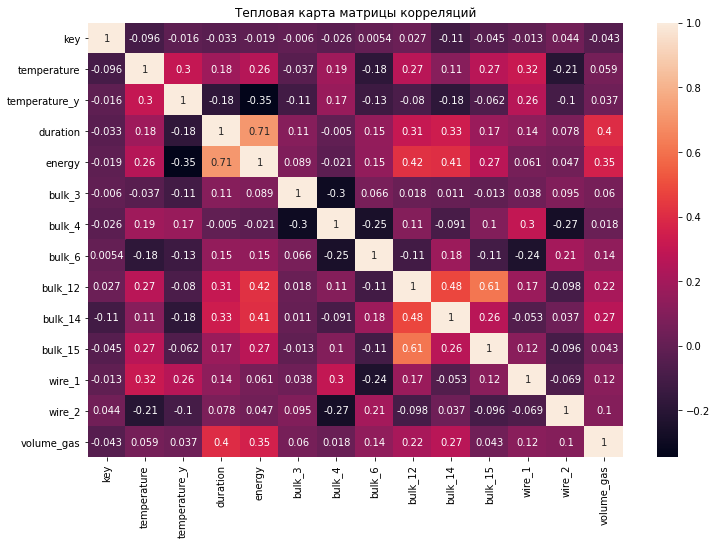

In [80]:
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Тепловая карта матрицы корреляций');

по тепловой диаграмме видно, что связей между целевым признаком и всеми остальными нет, то есть использовать линейные модели крайне не логично. 
Перейдем к изучению всех признаков поподробнее. Прскольку удаление возможно только после разделения на обучающую и тестовую выборки, на этом этапе мы отметим, что нужно будет удалить, а на следующем этапе после разделения уже удалим. 

Прежде всего посмотрим на все распределения в целом.

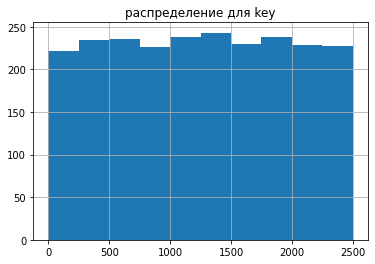

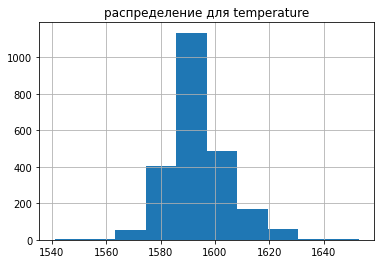

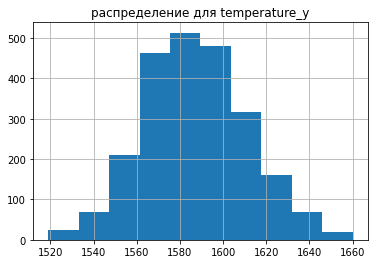

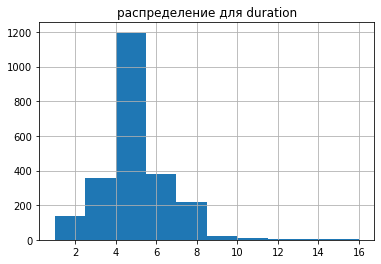

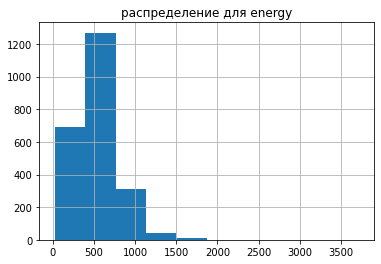

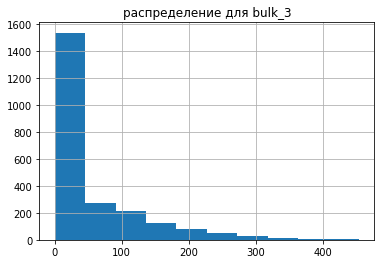

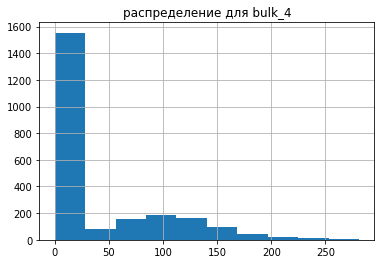

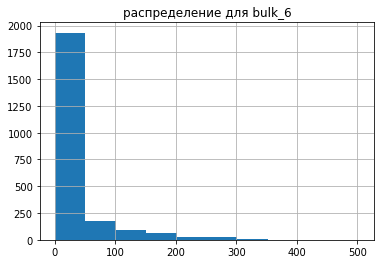

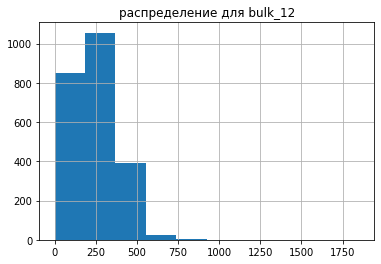

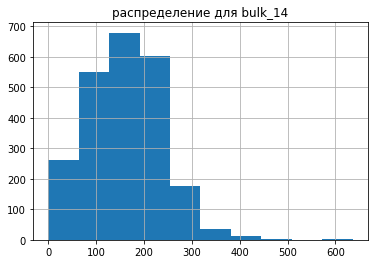

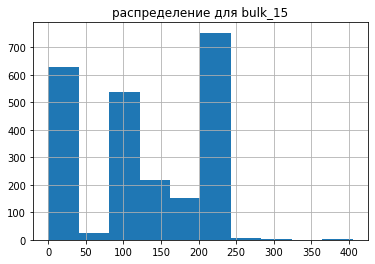

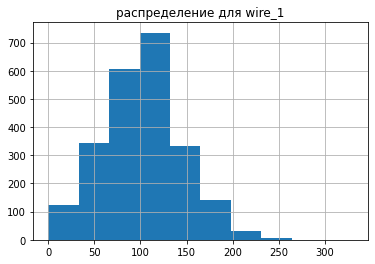

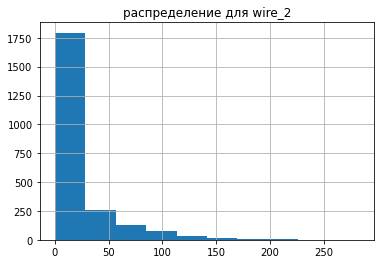

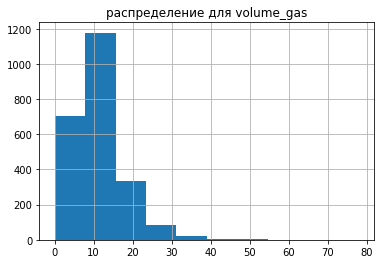

In [85]:
for col in data_without_data.columns:
    data_without_data[col].hist()
    plt.title('распределение для {}'.format(col))
    plt.show()

По данным гистограммам видно, что значения температур имеют нормальные распределения и практически не имеют выбросов (только таргеты имеют небольшие, но какие мы сейчас и увидим)

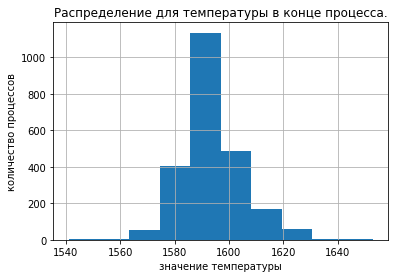

In [86]:
plt.title('Распределение для температуры в конце процесса.')
data_without_data['temperature'].hist()
plt.xlabel('значение температуры')
plt.ylabel('количество процессов');

по данной гистограмме видно, что данные чисты и выбросов не имеют.

Рассотрим распределение для начальной температуры

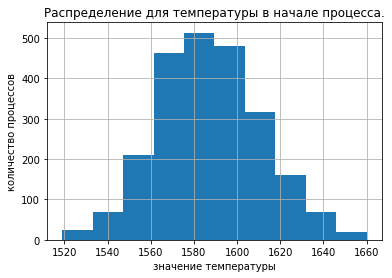

In [87]:
plt.title('Распределение для температуры в начале процесса.')
data_without_data['temperature_y'].hist()
plt.xlabel('значение температуры')
plt.ylabel('количество процессов');

Здесь тоже наблюдается нормальное распределение без выбросов, так что удалять никакие строки не нужно:)

Теперь переходим к количеству этапов нагрева

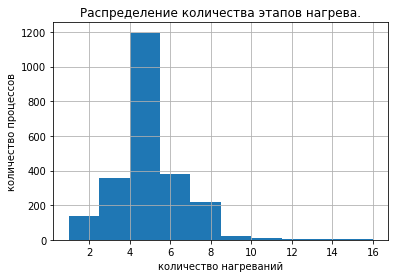

In [88]:
plt.title('Распределение количества этапов нагрева.')
data_without_data['duration'].hist()
plt.xlabel('количество нагреваний')
plt.ylabel('количество процессов');

как мы видим, здесь категорически мало значений после 12, выведем их и посмотрим, сколько это в процентах от всей выборки.

In [89]:
print(data_without_data.query('duration>=12')['duration'].count()/len(data_without_data)*100)

0.30120481927710846


Это всего 0,3 процента, так что все строки, где количество нагреваний больше 12 можно будет удалить

Рассмотрим столбец energy:

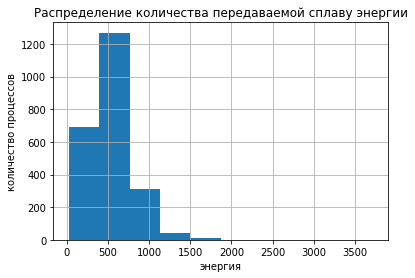

In [90]:
plt.title('Распределение количества передаваемой сплаву энергии')
data_without_data['energy'].hist()
plt.xlabel('энергия')
plt.ylabel('количество процессов');

Как мы видим по распределению, здесь есть большие выбросы (выбросами можно считать значения большие 2000, поскольку их даже не видно, судя по всему они содержатся в единичном эквиваленте)

Что же касается всех BULK_{} и WIRE_{}, то здесь мы их рассматривать не будем, потому что на этапе определения важности признака мы поняли, что они важны, хоть и распределения у них не очень.

Рассмотрим, столбец с объемом газа

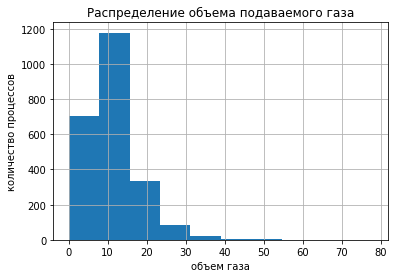

In [91]:
plt.title('Распределение объема подаваемого газа')
data_without_data['volume_gas'].hist()
plt.xlabel('объем газа')
plt.ylabel('количество процессов');

Как мы видим, здесь тоже присутствуют выбросы (все значения, большие 55), которые тоже нужно будет удалить.

Перейдем к проверке корректности данных ( то есть мы будем смотреть, везде ли времена действий попадают в рамки процесса, обозначенного, как measurement_time_у и measurement_time)

In [92]:
indexies=[]
for i in range(len(full_data)):
    flag=False
    if full_data.iloc[i]['measurement_time_y']>=full_data.iloc[i]['measurement_time']:
        flag=True
    if full_data.iloc[i]['electrode_start']>=full_data.iloc[i]['electrode_end']:
        flag=True
    if full_data.iloc[i]['electrode_end']>=full_data.iloc[i]['measurement_time'] or\
    full_data.iloc[i]['electrode_start']<full_data.iloc[i]['measurement_time_y']:
        flag=True
    if flag:
        indexies.append(i)
print(indexies)

[]


Таких значений в таблице нет, проверим, есть ли такие значения во времени с помощью таблиц data_bulk_materials_t и data_wire_t

Для того, чтобы не сравнивать все значения,  нам для обнаружения ошибки достаточно знать наибольшее время, когда было совершено действие и сравнить его с окончанием процесса. 
Для этого в таблица data_bulk_materials_t и data_wire_t создадим столбцы с максимальным временем для каждого процесса, после чего сравним его со временем финального измерения.

In [93]:
new_data=data_bulk_materials_t.drop(columns='key')
display(new_data.head())

,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15
0,NaT,2019-05-03 11:28:48,NaT,2019-05-03 11:24:31,2019-05-03 11:14:50,2019-05-03 11:10:43
1,NaT,2019-05-03 11:36:50,NaT,2019-05-03 11:53:30,2019-05-03 11:48:37,2019-05-03 11:44:39
2,NaT,2019-05-03 12:32:39,NaT,2019-05-03 12:27:13,2019-05-03 12:21:01,2019-05-03 12:16:16
3,NaT,2019-05-03 12:43:22,NaT,2019-05-03 12:58:00,2019-05-03 12:51:11,2019-05-03 12:46:36
4,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:30:47,2019-05-03 13:34:12,2019-05-03 13:30:47


In [94]:
new_data['max_time']=new_data.max(axis=1)
data_bulk_materials_t['max_time']=new_data['max_time']
display(data_bulk_materials_t.head())
del new_data

,key,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,max_time
0,1,NaT,2019-05-03 11:28:48,NaT,2019-05-03 11:24:31,2019-05-03 11:14:50,2019-05-03 11:10:43,2019-05-03 11:28:48
1,2,NaT,2019-05-03 11:36:50,NaT,2019-05-03 11:53:30,2019-05-03 11:48:37,2019-05-03 11:44:39,2019-05-03 11:53:30
2,3,NaT,2019-05-03 12:32:39,NaT,2019-05-03 12:27:13,2019-05-03 12:21:01,2019-05-03 12:16:16,2019-05-03 12:32:39
3,4,NaT,2019-05-03 12:43:22,NaT,2019-05-03 12:58:00,2019-05-03 12:51:11,2019-05-03 12:46:36,2019-05-03 12:58:00
4,5,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:30:47,2019-05-03 13:34:12,2019-05-03 13:30:47,2019-05-03 13:34:12


Теперь для таблицы data_wire_t

In [95]:
new_data=data_wire_t.drop(columns='key')
new_data['max_time']=new_data.max(axis=1)
data_wire_t['max_time']=new_data['max_time']
display(data_wire_t.head())
del new_data

,key,wire_1,wire_2,max_time
0,1,2019-05-03 11:06:19,NaT,2019-05-03 11:06:19
1,2,2019-05-03 11:36:50,NaT,2019-05-03 11:36:50
2,3,2019-05-03 12:11:46,NaT,2019-05-03 12:11:46
3,4,2019-05-03 12:43:22,NaT,2019-05-03 12:43:22
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,2019-05-03 13:20:44


In [96]:
for i in range(len(full_data)):
    flag=False
    index=data_bulk_materials_t.loc[data_bulk_materials_t['key']==full_data.iloc[i]['key']].index[0]
    if data_bulk_materials_t.iloc[index]['max_time'] > full_data.iloc[i]['measurement_time']:
        flag=True
    index=data_wire_t.loc[data_wire_t['key']==full_data.iloc[i]['key']].index[0]        
    if data_wire_t.iloc[index]['max_time']> full_data.iloc[i]['measurement_time']:
        flag=True
        
    if flag:
        indexies.append(i)
print(indexies)

[]


Отлично, таких значений нет, то есть можем приступать к разделению  выборок на обучающую и тестовую. Но перед этим удалим всю информацию о времени и ключи. Но прежде удалим строки, где всего 1 измерение.

In [97]:
full_data=drop_keys(full_data, counts)
print(full_data.query('key==195'))

Empty DataFrame
Columns: [key, measurement_time, temperature, measurement_time_y, temperature_y, duration, electrode_end, electrode_start, energy, bulk_3, bulk_4, bulk_6, bulk_12, bulk_14, bulk_15, wire_1, wire_2, volume_gas]
Index: []


Все, таких ключей нет.

In [98]:
del data_wire_t
del data_bulk_materials_t
full_data=full_data.drop(columns=['key', 'measurement_time', 'measurement_time_y', 'electrode_end', 'electrode_start'])
display(full_data.head())

,temperature,temperature_y,duration,energy,bulk_3,bulk_4,bulk_6,bulk_12,bulk_14,bulk_15,wire_1,wire_2,volume_gas
0,1613,1571,5,628.616930,0.0,43.0,0.0,206.0,150.0,154.0,60.059998,0.00000,29.749986
1,1602,1581,4,395.281800,0.0,73.0,0.0,206.0,149.0,154.0,96.052315,0.00000,12.555561
2,1599,1596,5,581.774624,0.0,34.0,0.0,205.0,152.0,153.0,91.160157,0.00000,28.554793
3,1625,1601,4,543.710274,0.0,81.0,0.0,207.0,153.0,154.0,89.063515,0.00000,18.841219
4,1602,1576,4,412.180480,0.0,78.0,0.0,203.0,151.0,152.0,89.238236,9.11456,5.413692


**Вывод по данному этапу** На данном этапе мы проанализировали наши данные, поняли, какие значения нужно будет удалить в обучающей выборке, увидели с помощью коэффициентов Пирсона, что линейных зависимостей в выборке нет, так что использовать линейные модели не стоит.

## Подготовка данных

In [99]:
train, test=train_test_split(full_data, test_size=0.25, random_state=111223)
print('Размеры данных обучающей выборки.\nданные:{}'.format(train.shape))
print('Размеры данных тестовой выборки.\nданные:{}'.format(test.shape))

Размеры данных обучающей выборки.
данные:(1743, 13)
Размеры данных тестовой выборки.
данные:(581, 13)


теперь удалим все выбросы, которые отметили в прошлом пункте.

In [100]:
train=train.query('duration < 12 & energy < 2000 & volume_gas < 56')
print('Размеры данных обучающей выборки.\nданные:{}'.format(train.shape))

Размеры данных обучающей выборки.
данные:(1738, 13)


Теперь данные чисты и можно разбивать выборки на признаки и таргеты.

In [101]:
train_targets=train['temperature']
train_values=train.drop(columns=['temperature'])
print('Размеры данных обучающей выборки.\nданные:{}\nрезультаты:{}'.format(train_values.shape, train_targets.shape))

Размеры данных обучающей выборки.
данные:(1738, 12)
результаты:(1738,)


In [102]:
test_targets=test['temperature']
test_values=test.drop(columns=['temperature'])
print('Размеры данных тестовой выборки.\nданные:{}\nрезультаты:{}'.format(test_values.shape, test_targets.shape))

Размеры данных тестовой выборки.
данные:(581, 12)
результаты:(581,)


перед обучением нужно промасштабировать данные, так что применим StandardScaler

In [103]:
scaler = StandardScaler()
scaler.fit(train_values)
scaler.transform(train_values)
scaler.transform(test_values)

array([[-0.02141791, -0.45029311, -1.57391615, ..., -1.46674552,
         0.55993385,  1.75075481],
       [ 0.94928431, -2.37948643, -1.98885779, ..., -0.04305978,
        -0.05969219, -1.4561555 ],
       [-0.14803124, -0.45029311, -0.04258356, ...,  0.62824554,
        -0.52814448,  0.27019259],
       ...,
       [ 0.48503543,  0.19277133, -0.52749388, ...,  0.052069  ,
        -0.52814448,  3.74418216],
       [-0.48566679, -0.45029311,  0.22876387, ...,  1.15685769,
        -0.52814448, -0.54709007],
       [-0.4012579 , -0.45029311, -0.69973835, ...,  0.67364764,
        -0.52814448, -0.30010767]])

Теперь данные готовы к обучению. 
**Вывод по данному этапу:** На данном этапе мы подготовили выборки к процессу обучения, разделлив общую  и удалив выбросы из предыдущих пунктов. 

## Обучение моделей машинного обучения

Как мы уже поняли, использовать линейные модели бесполезно, хорошего качества добиться не удастся, так что перейдем сразу к деревьям принятия решений. 

In [100]:
tree=DecisionTreeRegressor()

In [101]:
param_grid={
    'max_depth': np.arange(1, 202, 50),
    'min_samples_split': np.arange(100, 203, 20), 
    'random_state':[111223]
}

In [102]:
tree_model=GridSearchCV(tree, param_grid=param_grid,  scoring='neg_mean_absolute_error', cv=3, verbose=3)
tree_model.fit(train_values, train_targets)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END max_depth=1, min_samples_split=100, random_state=111223; total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_split=100, random_state=111223; total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_split=100, random_state=111223; total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_split=120, random_state=111223; total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_split=120, random_state=111223; total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_split=120, random_state=111223; total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_split=140, random_state=111223; total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_split=140, random_state=111223; total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_split=140, random_state=111223; total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_split=160, random_state=111223; total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_split=160, 

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([  1,  51, 101, 151, 201]),
                         'min_samples_split': array([100, 120, 140, 160, 180, 200]),
                         'random_state': [111223]},
             scoring='neg_mean_absolute_error', verbose=3)

In [103]:
print(tree_model.best_score_, tree_model.best_params_)

-7.492972249550406 {'max_depth': 51, 'min_samples_split': 100, 'random_state': 111223}


Данного результата недостаточно, применим модели случайного леса.

In [104]:
param={
    'max_depth': np.arange(2, 15,1 ),
    'n_estimators': np.arange(1, 201, 20),
    'random_state': [111223]
}

In [105]:
forest=RandomForestRegressor()
forest_model=GridSearchCV(forest, param_grid=param,  scoring='neg_mean_absolute_error', cv=3, verbose=3)
forest_model.fit(train_values, train_targets)

Fitting 3 folds for each of 130 candidates, totalling 390 fits
[CV 1/3] END max_depth=2, n_estimators=1, random_state=111223; total time=   0.0s
[CV 2/3] END max_depth=2, n_estimators=1, random_state=111223; total time=   0.0s
[CV 3/3] END max_depth=2, n_estimators=1, random_state=111223; total time=   0.0s
[CV 1/3] END max_depth=2, n_estimators=21, random_state=111223; total time=   0.0s
[CV 2/3] END max_depth=2, n_estimators=21, random_state=111223; total time=   0.0s
[CV 3/3] END max_depth=2, n_estimators=21, random_state=111223; total time=   0.0s
[CV 1/3] END max_depth=2, n_estimators=41, random_state=111223; total time=   0.1s
[CV 2/3] END max_depth=2, n_estimators=41, random_state=111223; total time=   0.1s
[CV 3/3] END max_depth=2, n_estimators=41, random_state=111223; total time=   0.1s
[CV 1/3] END max_depth=2, n_estimators=61, random_state=111223; total time=   0.1s
[CV 2/3] END max_depth=2, n_estimators=61, random_state=111223; total time=   0.1s
[CV 3/3] END max_depth=2, n

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181]),
                         'random_state': [111223]},
             scoring='neg_mean_absolute_error', verbose=3)

In [106]:
print(forest_model.best_score_, forest_model.best_params_)

-6.666740964895787 {'max_depth': 9, 'n_estimators': 61, 'random_state': 111223}


В принципе этой точности достаточно, но постараемся 
И попробуем применить градиентный бустинг

In [107]:
param={
    'max_depth': np.arange(2, 15, 2),
    'learning_rate': [0.1],
    'n_estimators': np.arange(1, 202, 40),
    'random_state': [111223]
}

In [108]:
model=LGBMRegressor()
LGBM_model=GridSearchCV(model, param_grid=param,  scoring='neg_mean_absolute_error', cv=3, verbose=3)
LGBM_model.fit(train_values, train_targets)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=1, random_state=111223; total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=1, random_state=111223; total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=1, random_state=111223; total time=   0.5s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=41, random_state=111223; total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=41, random_state=111223; total time=   1.3s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=41, random_state=111223; total time=   0.7s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=81, random_state=111223; total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=81, random_state=111223; total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=81, random_state=111223; total time=   1.7s
[CV 1/3] END learning_r

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([  1,  41,  81, 121, 161, 201]),
                         'random_state': [111223]},
             scoring='neg_mean_absolute_error', verbose=3)

In [109]:
print(LGBM_model.best_score_, LGBM_model.best_params_)

-6.668473815221042 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 121, 'random_state': 111223}


In [107]:
dum=DummyRegressor()
dum.fit(train_values, train_targets)

DummyRegressor()

**Вывод:** На данном этапе мы обучили много моделей с помощью GridSearchCV, который подбирает лучшую модель по заданным гиперпараметрам (оценвая результаты обучения с помощью кросс-валидации). И, как оказалось, лучшая модель - случайный лес, который показал MAE 6.6667. 
Что же касается его гиперпараметров, использовать большую глубину  нет смысла, поскольку у нас всего 12 признаков, да и как показал результат тоже большое количество деревьев для хорошей оценки не требуется.

In [108]:
model_final=forest_model

## Тестирование лучшей модели

In [109]:
print('Результат лучшей на этапе обучения модели {} на тестовой: {}'.format(forest_model,\
                                                        mean_absolute_error(test_targets, model_final.predict(test_values))))

Результат лучшей на этапе обучения модели GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181]),
                         'random_state': [111223]},
             scoring='neg_mean_absolute_error', verbose=3) на тестовой: 6.474564490428514


In [110]:
print('Результат константной модели на тестовой выборке: {}'.format(mean_absolute_error(test_targets, dum.predict(test_values))))

Результат константной модели на тестовой выборке: 8.221301117671407


По результатам тестирования видно, что нам удалось добиться необходимой точности, причем наша модель куда лучше предсказывает температуру, по сравнению с константной моделью, что видно по результатам на тестовой выборке. 

провердем исследнование на важность признаков для нашей модели. 

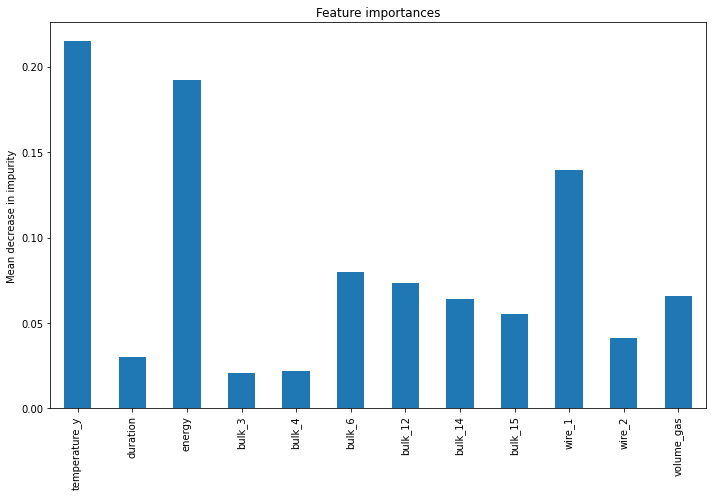

In [112]:
feature_names = train_values.columns 
model = RandomForestRegressor(max_depth= 9, n_estimators= 61, random_state=111223)
model.fit(train_values, train_targets)
importances = model.feature_importances_
model_importances = pd.Series(importances, index=feature_names)

std = np.std([model.feature_importances_ for tree in str(1000)], axis=0)

fig, ax = plt.subplots(figsize=(10,7))
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

как мы видим по графику, для нашей модели наиболее важные признаки: начальная температура, энергия и объе проволоки_1. Что жа касается остальных признаков, то они, кроме bulk_3, bulk_4 и duration,имеют примерно одинаковый вес. 
Отметим, что если допусть ошибку в одном из первых трех признаков, точность предсказкния может существенно снизиться. Что же касается последних 3, то если здесь допустить выброс, сильных изменений ответ не понесет.


## Общий вывод и рекомендации заказчику

В ходе выполнения данного проекта, мы проанализировали признаки и поняли, что далеко не все являются информативными (например большинство столбцов из таблицы data_bulk_new, где большинство значений не заполнено), что некоторые требуют большой предобработки, например количество подогревов, хотя это достаточно важный признак или энергия, передаваемая веществу. 
Так же были обнаружены выбросы, такие как температура расплавленной стали <1500, чего быть не может, либо же это не сталь, так что заказчику стоит внимательнее относиться к этим значениям. 
Были удалены небольшие выбросы, но они есть пркатически всегда, с этим ничего не поделать. 
Ну и конечно же, обучены разлиные модели. Выбрана с лучшей оценкой МАЕ, которую собственно мы и предлагаем заказчику. 

Описание модели. 
По результатам обучения на кросс-валидации была выбрана модель Случайного леса (RandomForestRegressor) с параметрами 'max_depth': 9, 'n_estimators': 61, 'random_state':111223, которая выдала на тестовой выборке МАЕ=6.4746

Эта модель лучшая среди всех, которые были обучены, причем дает очень даже неплохой результат, что может помочь в рассчете электроэнергии и дальнейшей ее оптимизации.   

Стоит отметить, что раз качество на тесте немного лучше, чем на кросс-валидации, переобучения у нас не наблюдается. 
